***
## Наследование стилей

Работа CSS зависит от структуры DOM. Например, CSS-правила, присвоенные определённому узлу, могут наследоваться всеми его потомками. 

Достаточно применить к `body` правила, устанавливающие размер и цвет шрифта...

```css
body {
  font-size: 40px;
  color: red;
}
```

...и большинство вложенных элементов приобретут те же свойства: любой текст, независимо от тега, в который он заключён, будь то `<h1>`, `<h2>` или `<p>`, будет отображён шрифтом красного цвета и размером в 40 пикселей. 

Слово *Cascading* в названии языка (Cascading Style Sheets) указывает именно на это **наследование, каскадность**.

Обычно наследование применяют там, где нужно задать общие параметры текста (цвет, размер, начертание шрифта).

Основные наследуемые свойства:

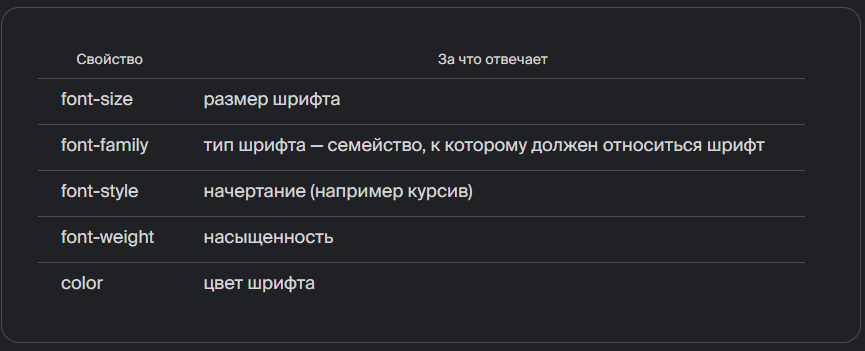

Это не полный список наследуемых свойств, но пока ограничимся этим.

Есть и свойства, которые не передаются по наследству (всё как у людей).

В основном это параметры позиционирования, размеров, отступов, фона и рамок: они не наследуются дочерними элементами.

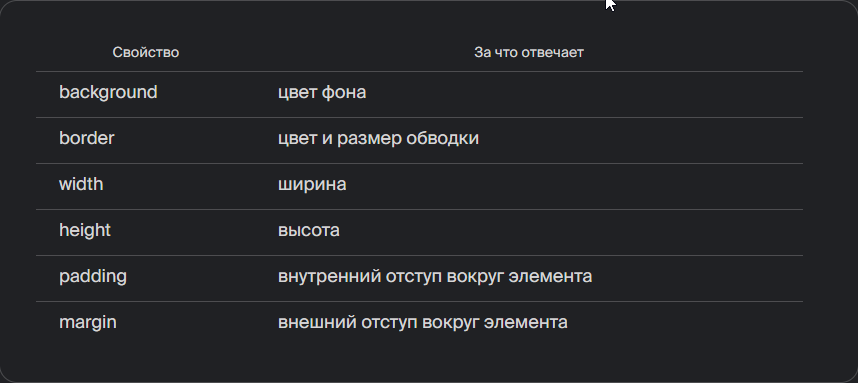

Со свойствами ё и ё традиционно возникает путаница; разницу между ними проще всего показать на картинке.

![alt text](https://pictures.s3.yandex.net/resources/picture2_1676928937.png)

У любого элемента (будь то div, p или h1) есть определённые границы. 

Свойство padding определяет отступ от этих границ до содержимого элемента (например, от границ элемента h1 до текста, содержащегося в нём). 

Свойство margin определяет расстояние до следующего элемента.

Узнать, наследуется свойство или нет, можно [на странице с описанием стандартов CSS](https://developer.mozilla.org/ru/docs/Web/CSS/Reference#%D1%81%D0%BF%D1%80%D0%B0%D0%B2%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D1%83%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C).


***
## Специфичность селекторов и конфликт свойств

К одному элементу можно применить несколько CSS-правил, описанных для разных селекторов. Если в этих правилах описаны одинаковые свойства с разными значениями, то возникнет конфликт:

```html
...
<style>
  .big-text {
    font-size: 100px;
  }
  #very-big-text {
    font-size: 100500px;
  }
</style>
...
<body>
  <h1 id="very-big-text" class="big-text">
    Большой заголовок большой страницы
  </h1>
</body>
```

Для решения таких конфликтов есть понятие **«специфичность селекторов»**.

В общем случае правило такое: чем меньше количество элементов, которые потенциально может выбрать селектор, тем этот селектор **приоритетнее** (специфичнее, весомее).

Селектор по тегу выберет все указанные теги, вне зависимости от того, задан ли им класс или `id`. Селектор по классу может выбрать несколько элементов (ведь в коде может быть несколько тегов с одинаковым значением атрибута `class`). А селектор по идентификатору всегда укажет только на один элемент (ведь `id` в пределах страницы должен быть уникален). Выходит, самый высокий приоритет — у селектора по `id`, а самый низкий — у селектора по тегу.

Можно выделить четыре уровня специфичности селекторов (в порядке повышения приоритета):

* селектор по тегу;

* селектор по классу;

* селектор по ID;

* стиль, описанный *inline*, в атрибуте `style` прямо в HTML-коде.

Может оказаться и так, что к одному элементу применены два селектора с одинаковым приоритетом. В такой ситуации действует правило «какие стили описаны ниже, те и приоритетнее».

```html
...
<style>
  .blue-class {
    color: blue;
  }
  .red-class { <!-- Этот класс описан ниже, чем .blue-class, он приоритетнее -->
    color: red;
  }
</style>
...
<p class="red-class blue-class">
   Текст
</p>
```

Текст в теге `p` будет красным: описание правил для `.red-class` стоит в коде ниже, чем описание `.blue-class`.